In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

In [61]:
df = pd.DataFrame(pd.read_csv("Loan_data_train.csv"))

In [62]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
print(df.shape)
print(df.columns)

(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [64]:
categorical = [var for var in df if df[var].dtype == 'object']
numerical = [var for var in df if df[var].dtype != 'object']

print("Categorical: ",categorical,"\nNumerical: ", numerical)

Categorical:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
Numerical:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [65]:
print(df[numerical].isnull().sum())     #total number of midding values
print("\n***In form of Percentage***")
print(df[numerical].isnull().mean())     #percentage of missing values


ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

***In form of Percentage***
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
dtype: float64


In [66]:
print(df[categorical].isnull().sum())
print("\n***In form of Percentage***")
print(df[categorical].isnull().mean())

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

***In form of Percentage***
Loan_ID          0.000000
Gender           0.021173
Married          0.004886
Dependents       0.024430
Education        0.000000
Self_Employed    0.052117
Property_Area    0.000000
Loan_Status      0.000000
dtype: float64


In [67]:
#imputate other missing numerical values with varibles' means
for var in numerical:     
    df[var].fillna(df[var].median(), inplace=True) 

In [68]:
#drop rows with missing 'Credit_History' values
df['Credit_History'].dropna(axis=0) 

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [69]:
print(df[numerical].isnull().sum())

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [70]:
#imputate missing values in categorical columns 
for var in categorical:     
    df[var].fillna(df[var].mode()[0], inplace=True)
    
print(df[categorical].isnull().sum())

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64


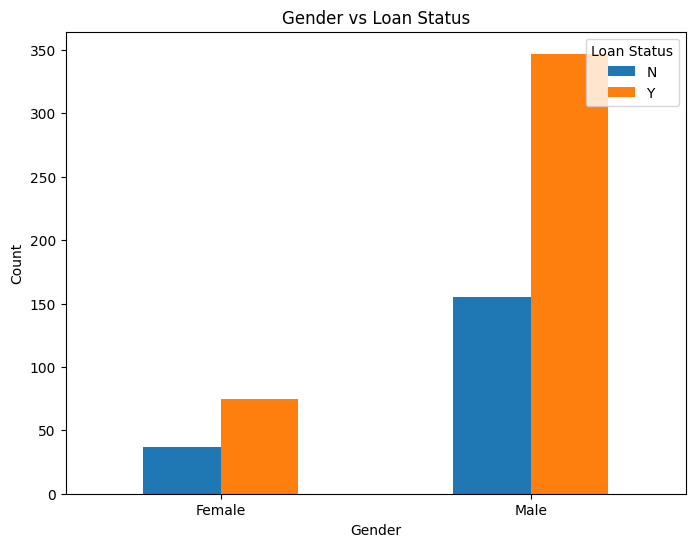

In [71]:
# Plotting gender vs loan status
gender_loan_status = pd.crosstab(df['Gender'], df['Loan_Status'])
gender_loan_status.plot(kind='bar', figsize=(8, 6))

plt.title('Gender vs Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loan Status', loc='upper right')

plt.show()

From the chart above, we can conclude that male applicants have higher percentage of loan approval than female applicants 

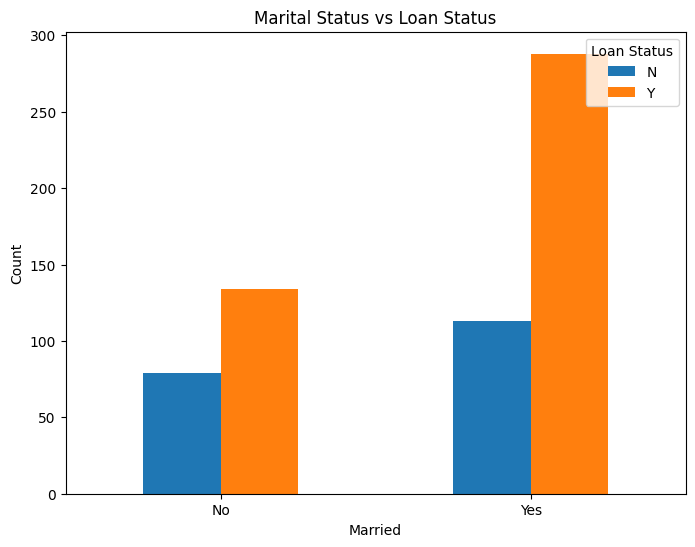

In [72]:
# Plotting Marital Status vs loan status
gender_loan_status = pd.crosstab(df['Married'], df['Loan_Status'])
gender_loan_status.plot(kind='bar', figsize=(8, 6))

plt.title('Marital Status vs Loan Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loan Status', loc='upper right')

plt.show()

From the chart above, we can conclude that the we have more married thand single customer approved for loan

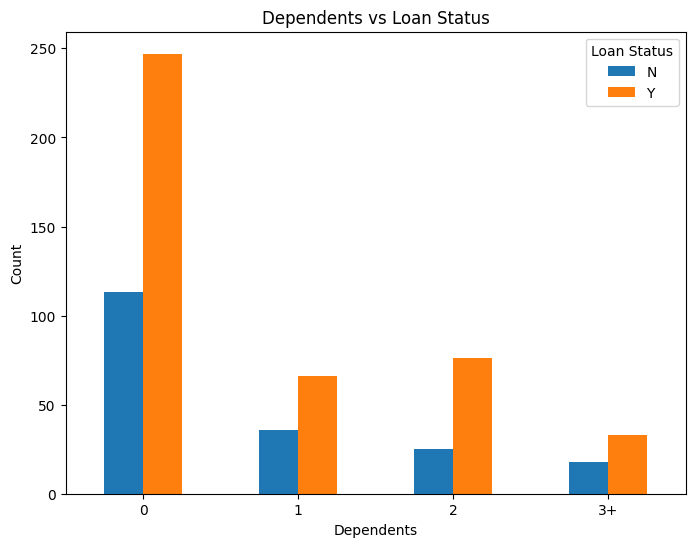

In [73]:
# Plotting Dependent vs loan status
gender_loan_status = pd.crosstab(df['Dependents'], df['Loan_Status'])
gender_loan_status.plot(kind='bar', figsize=(8, 6))

plt.title('Dependents vs Loan Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loan Status', loc='upper right')

plt.show()

From the chart, we can see that the number of dependents may automatically affect the approvals of home loans. There is a higher chance of getting home loan approval for applicants who have less number of dependents or no dependents.

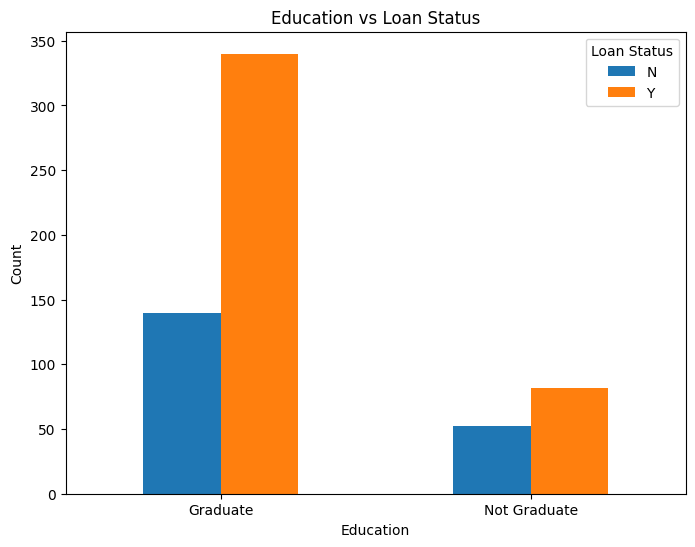

In [74]:
# Plotting Education vs loan status
gender_loan_status = pd.crosstab(df['Education'], df['Loan_Status'])
gender_loan_status.plot(kind='bar', figsize=(8, 6))

plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loan Status', loc='upper right')

plt.show()

From the chart above, we can conclude that the applicants who are graduate were in higher percentage of loan approval than non-graduate applicants.

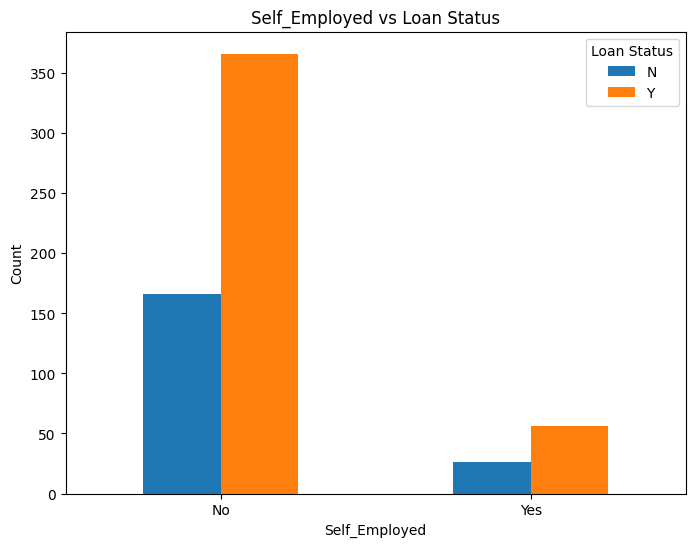

In [75]:
# Plotting Self_Employed vs loan status
gender_loan_status = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
gender_loan_status.plot(kind='bar', figsize=(8, 6))

plt.title('Self_Employed vs Loan Status')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loan Status', loc='upper right')

plt.show()

From the chart above, we can see that non self employed applicant were more approved for loan that the self employed applicant

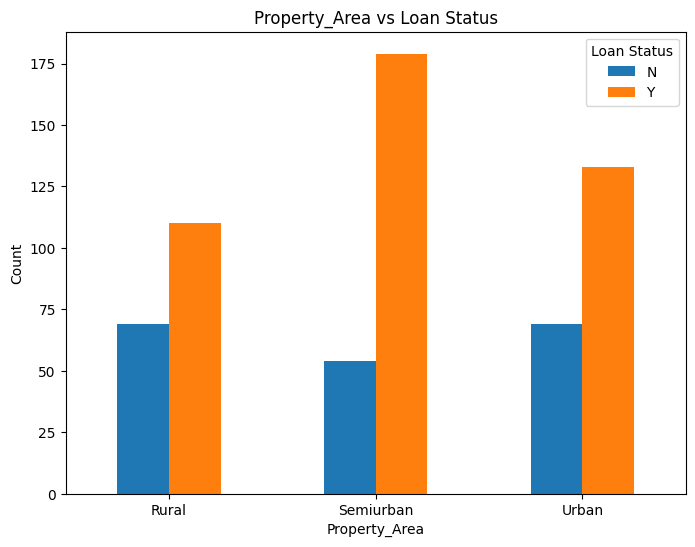

In [76]:
# Plotting Property_Area vs loan status
gender_loan_status = pd.crosstab(df['Property_Area'], df['Loan_Status'])
gender_loan_status.plot(kind='bar', figsize=(8, 6))

plt.title('Property_Area vs Loan Status')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loan Status', loc='upper right')

plt.show()

From the chart above results we can infer that, the higher percentage of loan approval is for semi-urban houses followed by urban and rural houses

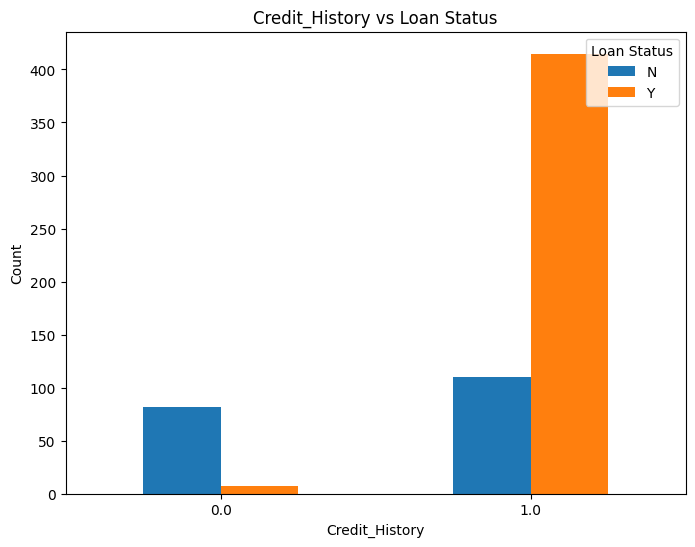

In [77]:
# Plotting Credit_History vs loan status
gender_loan_status = pd.crosstab(df['Credit_History'], df['Loan_Status'])
gender_loan_status.plot(kind='bar', figsize=(8, 6))

plt.title('Credit_History vs Loan Status')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loan Status', loc='upper right')

plt.show()

From the chart above results we can infer that, the higher percentage of loan approval is for customers having credit history.

In [78]:
df_copy = df.copy()

In [79]:
df_copy.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [80]:
# Seperate target variable and remove Loan_Id as no use of Loan_id here
X = df.drop(['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']

In [81]:
# Define preprocessing steps
categorical_columns = ['Gender', 'Married',  'Education', 'Self_Employed', 'Property_Area','Dependents']
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
       , ('num', StandardScaler(), numeric_columns)
    ]
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(solver='liblinear', random_state=0))
])

In [82]:
#seperate the data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area',
                                                   'Dependents']),
                                                 ('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('model',
                 LogisticRegression(random_state=0, solver='liblinear'))])

In [84]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
533,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,1.0,Semiurban
452,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural
355,Female,No,0,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban


In [85]:
# Predict on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8373983739837398
Confusion Matrix:
[[15 18]
 [ 2 88]]


In [87]:
# Save the pipeline and preprocessing steps
joblib.dump(pipeline, 'loan_prediction_model.pkl')

['loan_prediction_model.pkl']

In [88]:
# Load the trained pipeline
loaded_pipeline = joblib.load('loan_prediction_model.pkl')

In [89]:
# Define a sample test case
sample_test_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'Property_Area': 'Urban',
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1
}

In [90]:
# Convert the test data dictionary to a DataFrame
test_df = pd.DataFrame(sample_test_data, index=[0])


In [91]:
# Use the loaded pipeline to make predictions on the test data
predicted_prob = loaded_pipeline.predict_proba(test_df)[:, 1]
predicted_class = loaded_pipeline.predict(test_df)

print("Predicted Probability:", predicted_prob)
print("Predicted Class:", predicted_class)

Predicted Probability: [0.7903355]
Predicted Class: ['Y']
